In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Update with the correct file path and name
file_path = r'F:\credit risk\credit risk projects\Raw_Credit_Risk_Data.csv'

# Try to read the file
df = pd.read_csv(file_path)

# Print the first few rows of the data to check if it loaded correctly
print(df.head())




   Age  Annual Income Marital Status Education Level  Monthly Income  \
0   56          33343       Divorced   Undergraduate     2778.583333   
1   69          43500        Married     High School     3625.000000   
2   46          83222        Married        Graduate     6935.166667   
3   32          59375       Divorced     High School     4947.916667   
4   60          39662       Divorced        Graduate     3305.166667   

   Monthly Expenses  Credit Balance  Credit Limit  Credit Utilization  \
0              1377            6699          5597            1.196891   
1              3946           18625         24446            0.761883   
2              3963            2125          7336            0.289667   
3              1526           11793         14879            0.792594   
4              3781            7764          5572            1.393396   

   Num of Loans  Default History  Credit Inquiries  Average Monthly Spending  \
0             1                1                

In [22]:
# Check for missing data
print(df.isnull().sum())


Age                              0
Annual Income                    0
Monthly Income                   0
Monthly Expenses                 0
Credit Balance                   0
Credit Limit                     0
Credit Utilization               0
Num of Loans                     0
Default History                  0
Credit Inquiries                 0
Average Monthly Spending         0
Marital Status_Married           0
Marital Status_Single            0
Education Level_High School      0
Education Level_PhD              0
Education Level_Undergraduate    0
Repayment Behavior_Good          0
Repayment Behavior_Poor          0
dtype: int64


In [12]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['Marital Status', 'Education Level', 'Repayment Behavior'], drop_first=True)

# Display the first few rows to check the changes
print(df.head())


   Age  Annual Income  Monthly Income  Monthly Expenses  Credit Balance  \
0   56          33343     2778.583333              1377            6699   
1   69          43500     3625.000000              3946           18625   
2   46          83222     6935.166667              3963            2125   
3   32          59375     4947.916667              1526           11793   
4   60          39662     3305.166667              3781            7764   

   Credit Limit  Credit Utilization  Num of Loans  Default History  \
0          5597            1.196891             1                1   
1         24446            0.761883             4                0   
2          7336            0.289667             4                0   
3         14879            0.792594             0                0   
4          5572            1.393396             0                0   

   Credit Inquiries  Average Monthly Spending  Marital Status_Married  \
0                 4                      2820          

In [13]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_cols = ['Age', 'Annual Income', 'Monthly Income', 'Monthly Expenses', 'Credit Balance', 
                  'Credit Limit', 'Credit Utilization', 'Num of Loans', 'Credit Inquiries', 'Average Monthly Spending']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to check the scaling
print(df.head())


        Age  Annual Income  Monthly Income  Monthly Expenses  Credit Balance  \
0  0.784233      -1.540440       -1.540440         -1.280065       -0.717508   
1  1.649686      -1.154321       -1.154321          1.655617        1.464075   
2  0.118500       0.355711        0.355711          1.675044       -1.554214   
3 -0.813526      -0.550833       -0.550833         -1.109797        0.214320   
4  1.050527      -1.300223       -1.300223          1.467066       -0.522691   

   Credit Limit  Credit Utilization  Num of Loans  Default History  \
0     -1.669386            0.731043     -0.741026                1   
1      0.974157            0.008758      1.368157                0   
2     -1.425494           -0.775308      1.368157                0   
3     -0.367600            0.059749     -1.444087                0   
4     -1.672892            1.057318     -1.444087                0   

   Credit Inquiries  Average Monthly Spending  Marital Status_Married  \
0          1.357731      

In [14]:
# Define the target (y) and features (X)
X = df.drop('Default History', axis=1)  # Drop target column
y = df['Default History']  # Target variable

# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (400, 17)
Testing data shape: (100, 17)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        78
           1       0.00      0.00      0.00        22

    accuracy                           0.77       100
   macro avg       0.39      0.49      0.44       100
weighted avg       0.61      0.77      0.68       100

Confusion Matrix:
[[77  1]
 [22  0]]
ROC-AUC Score: 0.55


In [17]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a new Logistic Regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model again
y_pred_resampled = model.predict(X_test)
print(classification_report(y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.77      0.59      0.67        78
           1       0.20      0.36      0.26        22

    accuracy                           0.54       100
   macro avg       0.48      0.48      0.46       100
weighted avg       0.64      0.54      0.58       100



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82        78
           1       0.23      0.14      0.17        22

    accuracy                           0.71       100
   macro avg       0.51      0.50      0.50       100
weighted avg       0.66      0.71      0.68       100



In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [5, 10, 20, None],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
# Make predictions on the test set with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best_rf))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82        78
           1       0.23      0.14      0.17        22

    accuracy                           0.71       100
   macro avg       0.51      0.50      0.50       100
weighted avg       0.66      0.71      0.68       100



In [6]:
# Update with the correct file path and name
file_path = r'F:\credit risk\credit risk projects\Raw_Credit_Risk_Data.csv'

# Try to read the file
df = pd.read_csv(file_path)

# Print the first few rows of the data to check if it loaded correctly
print(df.head())




   Age  Annual Income Marital Status Education Level  Monthly Income  \
0   56          33343       Divorced   Undergraduate     2778.583333   
1   69          43500        Married     High School     3625.000000   
2   46          83222        Married        Graduate     6935.166667   
3   32          59375       Divorced     High School     4947.916667   
4   60          39662       Divorced        Graduate     3305.166667   

   Monthly Expenses  Credit Balance  Credit Limit  Credit Utilization  \
0              1377            6699          5597            1.196891   
1              3946           18625         24446            0.761883   
2              3963            2125          7336            0.289667   
3              1526           11793         14879            0.792594   
4              3781            7764          5572            1.393396   

   Num of Loans  Default History  Credit Inquiries  Average Monthly Spending  \
0             1                1                

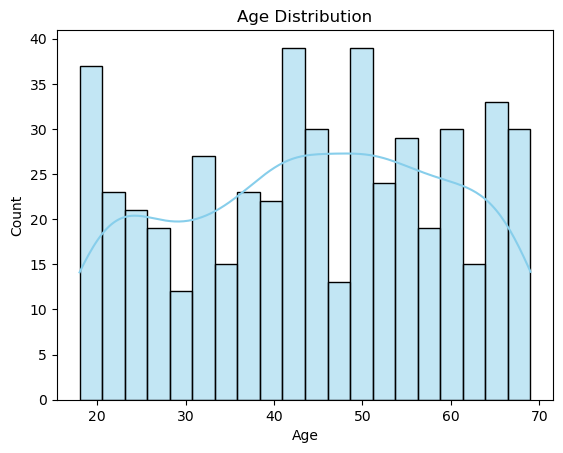

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age feature
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.show()


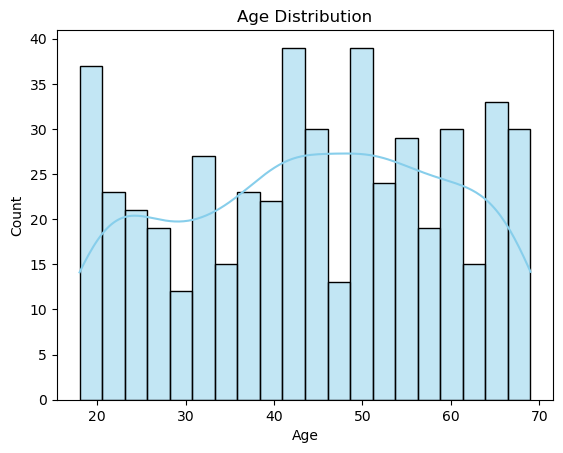

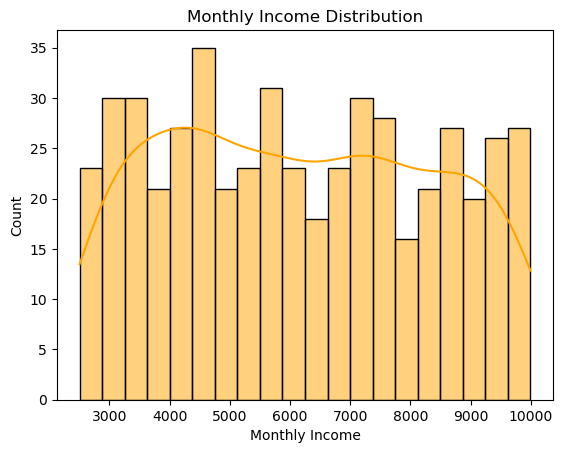

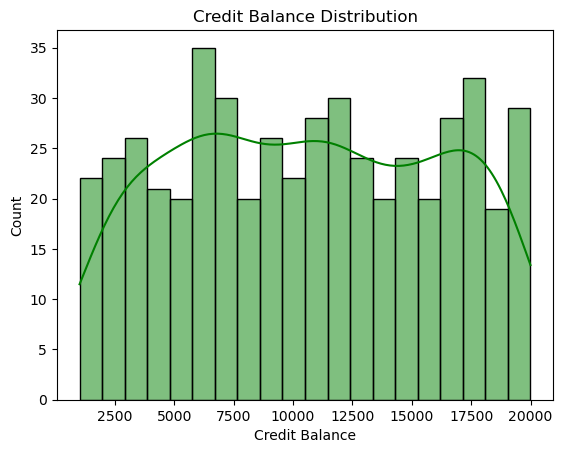

In [8]:
# Histogram for Age
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Histogram for Monthly Income
sns.histplot(df['Monthly Income'], kde=True, bins=20, color='orange')
plt.title('Monthly Income Distribution')
plt.show()

# Histogram for Credit Balance
sns.histplot(df['Credit Balance'], kde=True, bins=20, color='green')
plt.title('Credit Balance Distribution')
plt.show()


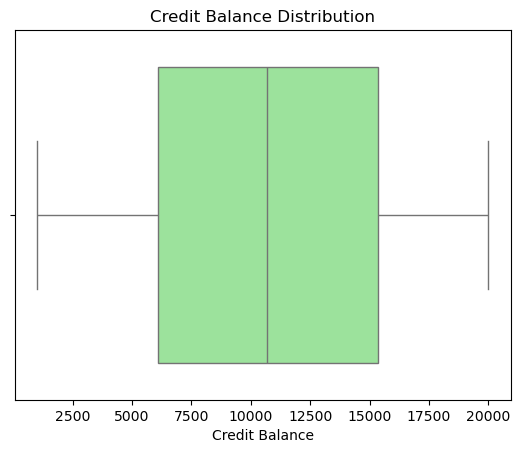

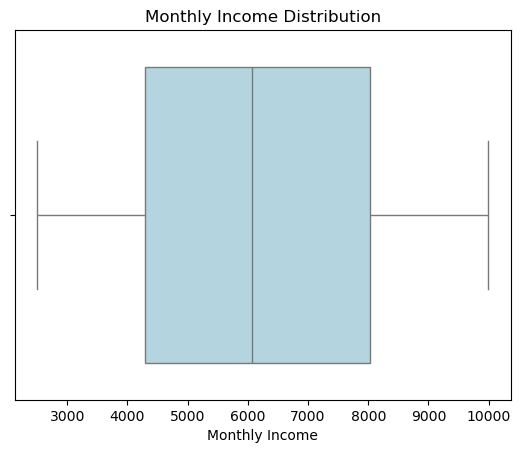

In [9]:
# Boxplot for Credit Balance
sns.boxplot(x=df['Credit Balance'], color='lightgreen')
plt.title('Credit Balance Distribution')
plt.show()

# Boxplot for Monthly Income
sns.boxplot(x=df['Monthly Income'], color='lightblue')
plt.title('Monthly Income Distribution')
plt.show()


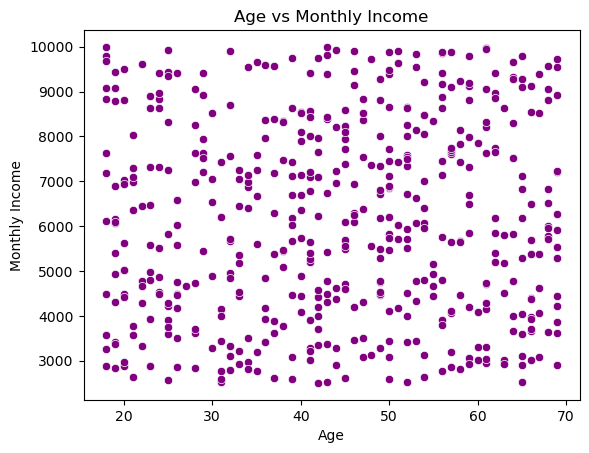

In [10]:
# Scatter Plot between Age and Monthly Income
sns.scatterplot(x=df['Age'], y=df['Monthly Income'], color='purple')
plt.title('Age vs Monthly Income')
plt.show()


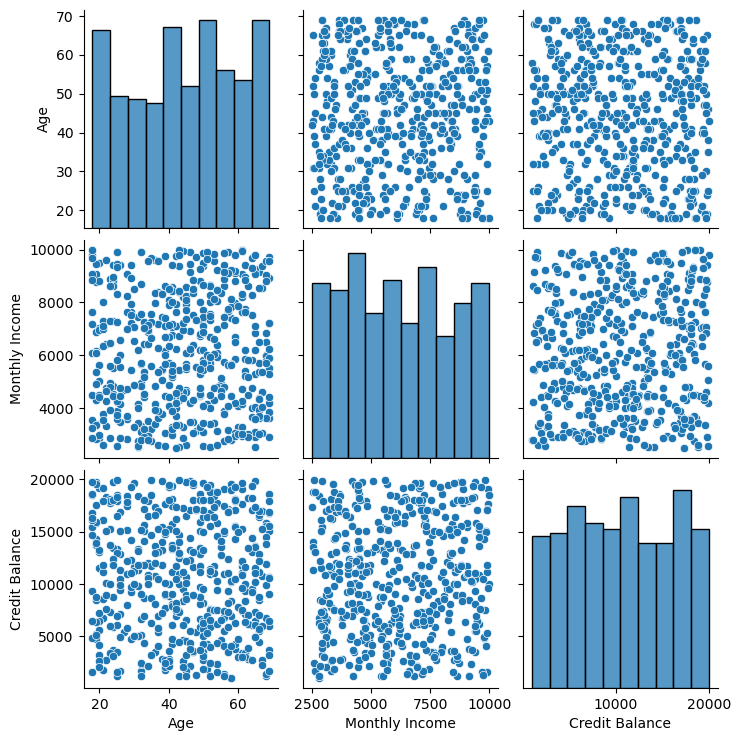

In [11]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['Age', 'Monthly Income', 'Credit Balance']])
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7728\2209884276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital Status', data=df, palette='Set2')


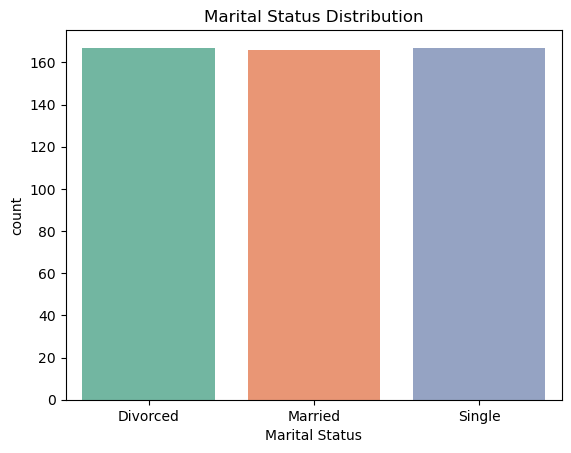

C:\Users\HP\AppData\Local\Temp\ipykernel_7728\2209884276.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Repayment Behavior', data=df, palette='coolwarm')


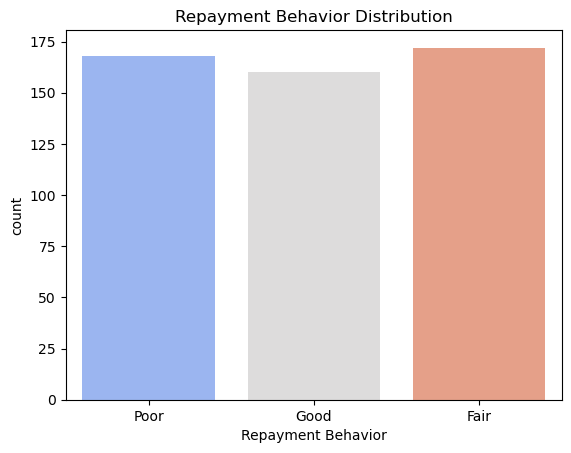

In [12]:
# Count plot for Marital Status
sns.countplot(x='Marital Status', data=df, palette='Set2')
plt.title('Marital Status Distribution')
plt.show()

# Count plot for Repayment Behavior
sns.countplot(x='Repayment Behavior', data=df, palette='coolwarm')
plt.title('Repayment Behavior Distribution')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7728\3022097305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default History', data=df, palette='coolwarm')


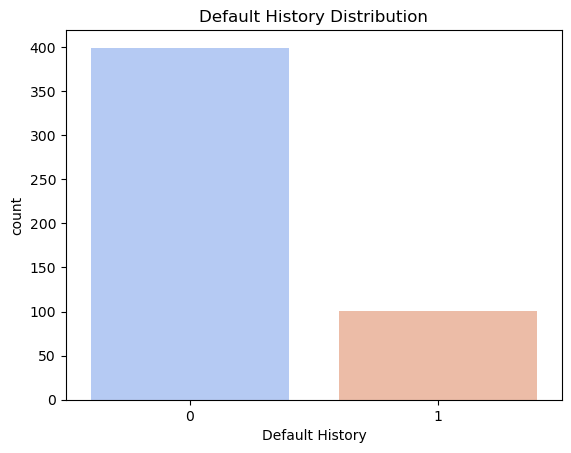

In [13]:
# Count plot for Default History (Target Variable)
sns.countplot(x='Default History', data=df, palette='coolwarm')
plt.title('Default History Distribution')
plt.show()


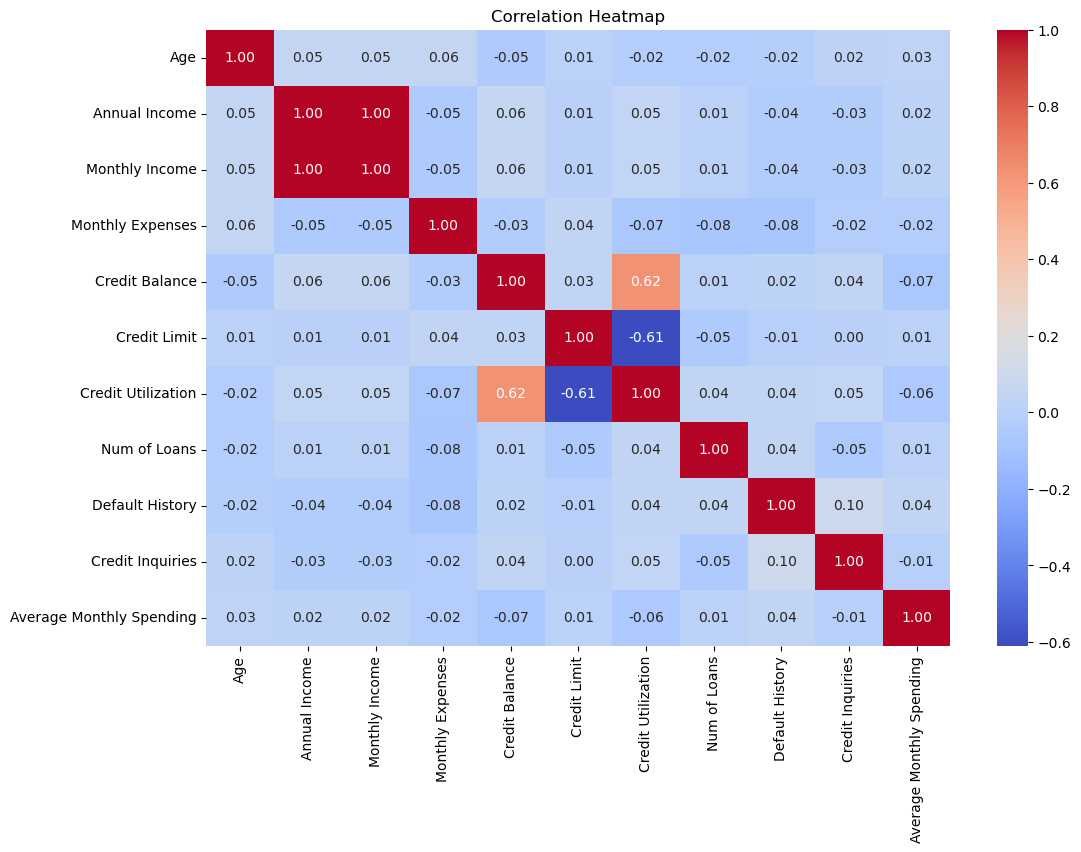

In [15]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values by filling them with the column mean
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Now calculate the correlation matrix on the numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [17]:
# Assuming 'Default History' is your target variable
X = df.drop('Default History', axis=1)  # Features (all columns except 'Default History')
y = df['Default History']  # Target variable (Default History)


In [18]:
from sklearn.model_selection import train_test_split

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
import pandas as pd

# Assuming df is your DataFrame
# One-Hot Encoding for categorical columns (e.g., 'Marital Status', 'Education Level', 'Repayment Behavior')
df_encoded = pd.get_dummies(df, drop_first=True)

# Now, split the data into features (X) and target (y)
X = df_encoded.drop('Default History', axis=1)  # Features (all columns except 'Default History')
y = df_encoded['Default History']  # Target variable ('Default History')

# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the first few rows to ensure everything looks good
print(X_train.head())


     Age  Annual Income  Monthly Income  Monthly Expenses  Credit Balance  \
249   69          34835     2902.916667              3558            3196   
433   18          34621     2885.083333              2798           16078   
19    41          81293     6774.416667              1583            6051   
322   42          44489     3707.416667              2608            7445   
332   58          67626     5635.500000              2637            4083   

     Credit Limit  Credit Utilization  Num of Loans  Credit Inquiries  \
249         17109            0.186802             1                 2   
433         11588            1.387470             4                 1   
19          20177            0.299896             2                 2   
322         12156            0.612455             2                 1   
332         28852            0.141515             4                 0   

     Average Monthly Spending  Marital Status_Married  Marital Status_Single  \
249               

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)


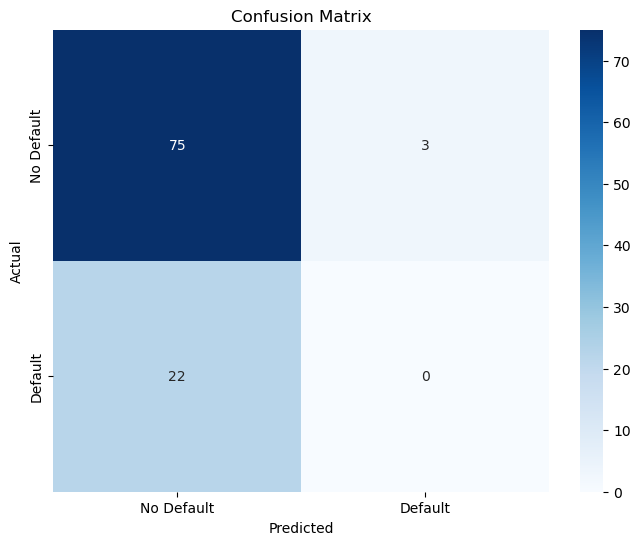

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
